In [ ]:
# prompt: En la ruta /content/drive/MyDrive/Colab Notebooks/PROYECTO/AllClases/ se encuentra varias imagenes, lee todas las imagenes del drive y ponlas en un solo dataset, el tamaño de las imagenes son de 1920 por 1280 y deben estar en blanco y negro. Por ultimo, el label se obtiene del mismo nombre antes del "_"

import os
import cv2
import numpy as np
from google.colab import drive

width = 480
height = 480
canales = 1

from google.colab import drive
drive.mount('/content/drive')

# Ruta de la carpeta donde se encuentran las imágenes
ruta_imagenes = '/content/drive/MyDrive/Colab Notebooks/PROYECTO/AllClases/'

# Lista para almacenar las imágenes
imagenes = []

# Lista para almacenar las etiquetas
etiquetas = []

# Obtener una lista de todos los archivos en la carpeta
archivos = os.listdir(ruta_imagenes)

# Recorrer todos los archivos
for archivo in archivos:
  # Verificar si el archivo es una imagen
  if archivo.endswith(".JPG"):
    # Leer la imagen en escala de grises
    imagen = cv2.imread(os.path.join(ruta_imagenes, archivo),0)

    # Redimensionar la imagen a 1920x1280
    imagen = cv2.resize(imagen, (width, height))

    # Obtener la etiqueta de la imagen
    etiqueta = archivo.split("_")[0]

    # Agregar la imagen y la etiqueta a las listas correspondientes
    imagenes.append(imagen)
    etiquetas.append(etiqueta)

# Convertir las listas a arrays de NumPy
imagenes = np.array(imagenes)
etiquetas = np.array(etiquetas)

# Imprimir el número de imágenes y etiquetas
print("Número de imágenes:", len(imagenes))
print("Número de etiquetas:", len(etiquetas))


Mounted at /content/drive


In [ ]:
import numpy as np
etiquetas = etiquetas.astype(np.int64)
import tensorflow as tf

In [ ]:

from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(imagenes, etiquetas, test_size=0.3, random_state=42)


In [ ]:

# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], width, height, canales)
x_test = x_test.reshape(x_test.shape[0], width, height, canales)
input_shape = (width, height, canales)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (294, 480, 480, 1)
Number of images in x_train 294
Number of images in x_test 126


In [ ]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)
model.summary()


Epoch 1/10
10/10 [==============================] - 85s 8s/step - loss: 172.6391 - accuracy: 0.4626
Epoch 2/10
10/10 [==============================] - 78s 8s/step - loss: 96.4638 - accuracy: 0.4456
Epoch 3/10
10/10 [==============================] - 78s 8s/step - loss: 23.8979 - accuracy: 0.5442
Epoch 4/10
10/10 [==============================] - 78s 8s/step - loss: 4.2076 - accuracy: 0.3673
Epoch 5/10
10/10 [==============================] - 79s 8s/step - loss: 3.0741 - accuracy: 0.4286
Epoch 6/10
10/10 [==============================] - 78s 8s/step - loss: 4.0336 - accuracy: 0.5952
Epoch 7/10
10/10 [==============================] - 79s 8s/step - loss: 3.2511 - accuracy: 0.6190
Epoch 8/10
10/10 [==============================] - 78s 8s/step - loss: 2.1365 - accuracy: 0.6735
Epoch 9/10
10/10 [==============================] - 82s 8s/step - loss: 2.1926 - accuracy: 0.6769
Epoch 10/10
10/10 [==============================] - 78s 8s/step - loss: 1.9350 - accuracy: 0.6769
Model: "sequent

In [ ]:
evaluation_result = model.evaluate(x_test, y_test)
print("Loss:", evaluation_result[0])
print("Accuracy:", evaluation_result[1])


4/4 [==============================] - 8s 2s/step - loss: 2.2111 - accuracy: 0.5952
Loss: 2.2111406326293945
Accuracy: 0.5952380895614624


1/1 [==============================] - 0s 394ms/step
3
3


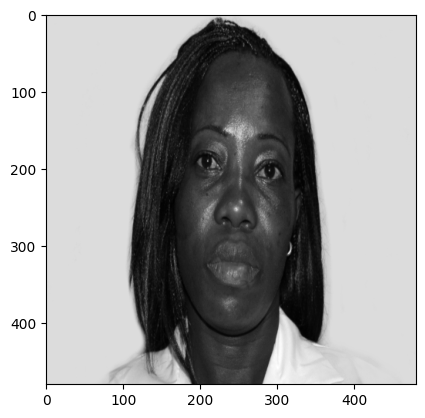

In [ ]:
import matplotlib.pyplot as plt
image_index = 0
plt.imshow(x_test[image_index].reshape(width, height),'gray')
pred = model.predict(x_test[image_index].reshape(1, width, height, canales))
predicted_class = np.argmax(pred)

print(predicted_class)
print(y_test[image_index])